In [1]:
%pylab inline
sys.path.append('./evo_methods/')
import lv_fp_methods as lfm
import cr_fp_methods as cfm
import resource_methods as res

plt.rcParams['figure.dpi'] = 70

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# auxiliary method used in some of the plots below
def get_strain_traj(strain_idx,K0,sample_rate,strain_idx_list,n_list,curr_idx=None):
    if curr_idx is None:
        curr_idx = max(0,(strain_idx-K0)//sample_rate+1)
    abund_traj = []
    epoch_range = []
    count = 0

    while curr_idx<len(strain_idx_list) and strain_idx in strain_idx_list[curr_idx]:
        loc = where(strain_idx_list[curr_idx]==strain_idx)[0][0]
        abund_traj.append(n_list[curr_idx][loc])
        epoch_range.append(max(0,strain_idx-K0)+count)
        curr_idx+=1
        count +=sample_rate
    if curr_idx!=len(strain_idx_list):
        abund_traj.append(0)
        epoch_range.append(max(0,strain_idx-K0)+count)
    return epoch_range, abund_traj

# Summary

In this notebook we run through examples of the evolutionary dynamics in three different models:
- Consumer resource model
- Linearized consumer resource model (with fixed population constraint)
- Generalized Lotka Volterra model (with fixed population constraint)

We do not integrate the ecological dynamical equations (though this can be done to check the validity of the algorithm). Rather we use a heuristic algorithm that correctly finds the unique stable fixed point in the majority of cases. This algorithm (as well as details of all three models mentioned above) is described in the paper
_Mahadevan, A., & Fisher, D. S. (2025). Continual evolution in nonreciprocal ecological models. PRX Life, 3(3), 033008._

# Consumer resource model

In [3]:
filename = 'res_evolution'
K0 = 5
D = 50
kappa = 0.8
mu = 1
sigma = .1
omega = 0
m = 1
Kvec = np.ones(D)
mut_corr = 0
num_epochs = 1000
sample_rate = 1
seed = 10
check_stability = True
max_iter = 10
epoch_save_num = 1000

res_evo = res.ResourceEvo(filename,K0,D,kappa,mu,sigma,omega,m,Kvec,mut_corr,num_epochs,sample_rate=sample_rate,
                 seed=seed,check_stability=check_stability,max_iter=max_iter,epoch_save_num=epoch_save_num)
res_evo.run_resource_evo()

0


In [4]:
with load('res_evolution.npz', allow_pickle = True) as file:
    data = file['data'].item()

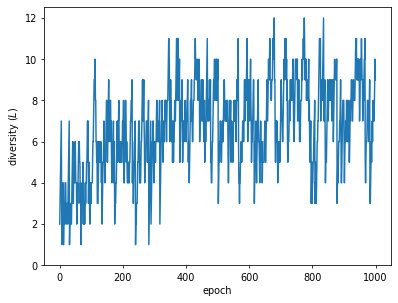

In [5]:
L_list = data['L_list']
epoch_list = data['epoch_list']

plot(epoch_list,L_list)
xlabel('epoch')
ylabel('diversity ($L$)')

ylim(0,)
show()

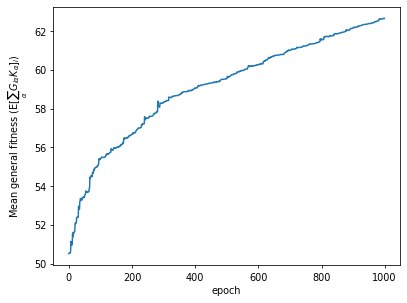

In [6]:
GK_list = data['GK_list']
epoch_list = data['epoch_list']

plot(epoch_list,[np.mean(X) for X in GK_list])
xlabel('epoch')
ylabel('Mean general fitness (${\\rm E}[\\sum_\\alpha G_{i\\alpha}K_{\\alpha}]_i$)')
show()

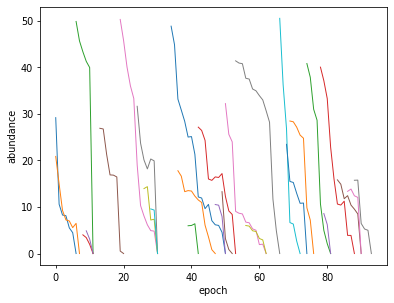

In [7]:
n_list = data['n_list']
strain_idx_list = data['strain_idx_list']
K0 = data['K0']

# plot the trajectories of strains that were abundant at various times in the past
max_idx = []
for i in arange(0,100,10):
    abunds = n_list[i]
    arg = argsort(abunds)[-3:]
    max_idx.extend(strain_idx_list[i][arg])

for strain_idx in unique(max_idx):
    epoch_range,abund_traj = get_strain_traj(strain_idx,K0,sample_rate,strain_idx_list,n_list)
    plot(epoch_range,abund_traj,linewidth=1)

xlabel('epoch')
ylabel('abundance')
show()

# Linearized consumer resource model

In [8]:
filename = 'lin_cr_evolution'
K = 50
D = 100
kappa = 0.8
num_epochs = 1000
sample_rate = 1
sig_s = 0
mut_corr = 0
max_iter = 0
supply_vec = np.zeros(D)
epochs_to_save_V = []
epoch_save_num = 1000
seed = 10
max_iter = 10
check_stability = False

cre = cfm.CREvo(filename,K,D,kappa,num_epochs,sample_rate=sample_rate,sig_s=sig_s,mut_corr=mut_corr,max_iter=max_iter,
                 supply_vec=supply_vec,epochs_to_save_V=[],epoch_save_num=epoch_save_num,seed=seed,check_stability=check_stability)
cre.run_evo()

0 34


In [9]:
with load('lin_cr_evolution.npz', allow_pickle = True) as file:
    data = file['data'].item()

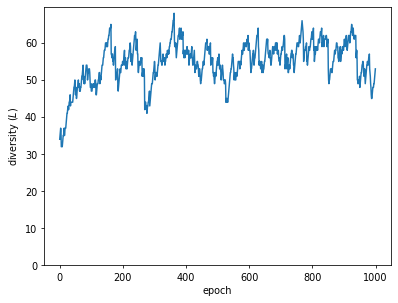

In [10]:
L_list = data['L_list']
epoch_list = data['epoch_list']

plot(epoch_list,L_list)
xlabel('epoch')
ylabel('diversity ($L$)')

ylim(0,)
show()

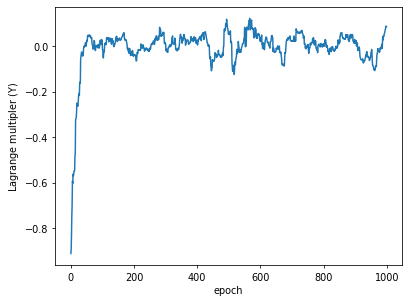

In [11]:
ups_list = data['ups_list']
epoch_list = data['epoch_list']

plot(epoch_list,ups_list)
xlabel('epoch')
ylabel('Lagrange multipler ($\\Upsilon$)')
show()

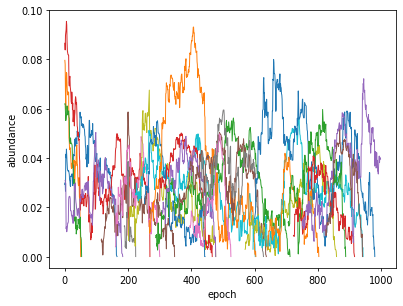

In [12]:
n_list = data['n_list']
strain_idx_list = data['strain_idx_list']
K0 = data['K']

# plot the trajectories of strains that were abundant at various times in the past
max_idx = []
for i in arange(0,1000,100):
    abunds = n_list[i]
    arg = argsort(abunds)[-3:]
    max_idx.extend(strain_idx_list[i][arg])

for strain_idx in unique(max_idx):
    epoch_range,abund_traj = get_strain_traj(strain_idx,K0,sample_rate,strain_idx_list,n_list)
    plot(epoch_range,abund_traj,linewidth=1)

xlabel('epoch')
ylabel('abundance')
show()

# Lotka Volterra model

In [13]:
filename = 'lv_evolution'

K = 50
Q = 10
gamma = 0
num_epochs = 1000
sample_rate = 1
sig_s = 0
epochs_to_save_V = []
epoch_save_num = 1000
seed = 10
max_iter = 10
check_stability = False

lve = lfm.LVEvo(filename,K,Q,gamma,num_epochs,sample_rate=sample_rate,sig_s=sig_s,epochs_to_save_V=epochs_to_save_V,
                 epoch_save_num=epoch_save_num,seed=seed,max_iter=max_iter,check_stability=check_stability)
lve.run_evo()

0 45


In [14]:
with load('lv_evolution.npz', allow_pickle = True) as file:
    data = file['data'].item()

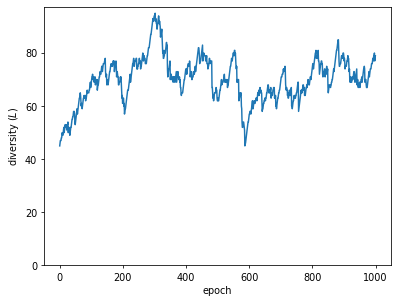

In [15]:
L_list = data['L_list']
epoch_list = data['epoch_list']

plot(epoch_list,L_list)
xlabel('epoch')
ylabel('diversity ($L$)')

ylim(0,)
show()

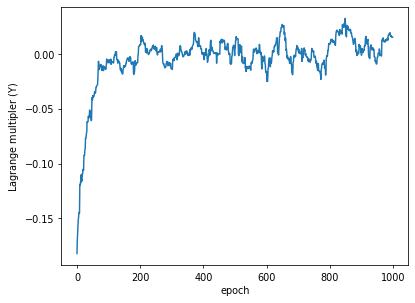

In [16]:
ups_list = data['ups_list']
epoch_list = data['epoch_list']

plot(epoch_list,ups_list)
xlabel('epoch')
ylabel('Lagrange multipler ($\\Upsilon$)')
show()

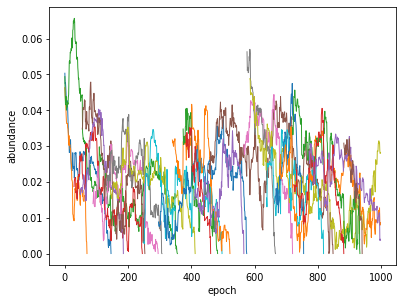

In [17]:
n_list = data['n_list']
strain_idx_list = data['strain_idx_list']
K0 = data['K']

# plot the trajectories of strains that were abundant at various times in the past
max_idx = []
for i in arange(0,1000,100):
    abunds = n_list[i]
    arg = argsort(abunds)[-3:]
    max_idx.extend(strain_idx_list[i][arg])

for strain_idx in unique(max_idx):
    epoch_range,abund_traj = get_strain_traj(strain_idx,K0,sample_rate,strain_idx_list,n_list)
    plot(epoch_range,abund_traj,linewidth=1)

xlabel('epoch')
ylabel('abundance')
show()